# Email Spam Classifier

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd

### Data Collection and analysis

In [2]:
spam = pd.read_csv("spam.csv")

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
# Data Cleaning

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last three coloumns

spam.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
spam.sample(5)

,v1,v2
4584,spam,U have a Secret Admirer who is looking 2 make ...
3090,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...
4439,ham,I've got it down to a tea. not sure which flavour
4493,ham,Man this bus is so so so slow. I think you're ...
4392,spam,RECPT 1/3. You have ordered a Ringtone. Your o...


In [8]:
#renaming the columns
spam.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [9]:
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
spam['target'] = encoder.fit_transform(spam['target'])

In [12]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values

spam.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
spam.duplicated().sum()

403

In [15]:
# removing duplicated values
spam = spam.drop_duplicates(keep= 'first')

In [16]:
spam.shape

(5169, 2)

Exploratory Data Analysis

In [17]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
spam['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
#visualisation of data

import matplotlib.pyplot as plt

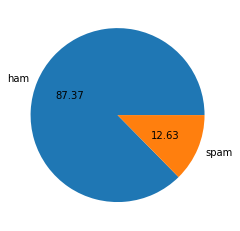

In [20]:
plt.pie(spam['target'].value_counts(), labels =['ham', 'spam'], autopct= "%.02f")
plt.show()

The above pie chart shows that our data is highly imbalanced. let's move ahead and analyze the text column.

In [21]:
#importing libraries

import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# creating coloumn which will contain the no. of characters

spam['num_char'] = spam['text'].apply(len)

In [24]:
# creating coloumn which will fetch no. of words

spam['num_words'] = spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
spam.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# creating coloumn which will fetch no. of sentences

spam['num_sent'] = spam['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
spam.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
spam[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#describing data for ham messages
spam[spam['target'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#describing data for spam messages
spam[spam['target'] == 1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [31]:
#plot histogram for ham and spam msgs

import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

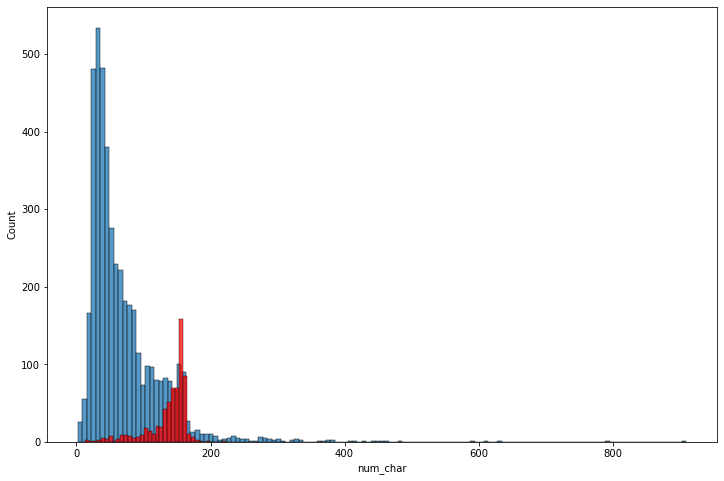

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam['target']==0]['num_char'])
sns.histplot(spam[spam['target']==1]['num_char'],color = 'red')

Above plotted histogram is for the number of characters in ham and spam msgs and we can clearly see that spam msgs have large number of charcters than ham msgs.

<AxesSubplot:xlabel='num_words', ylabel='Count'>

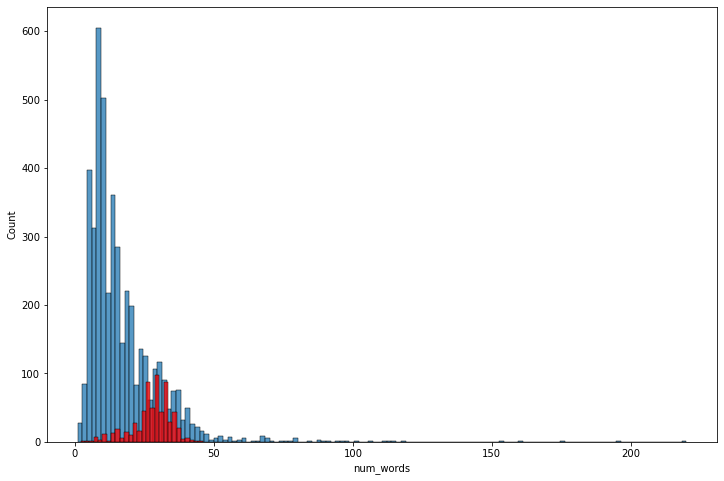

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam['target']==0]['num_words'])
sns.histplot(spam[spam['target']==1]['num_words'],color = 'red')

Similar to the previously plotted histogram,here,we can clearly see that spam msgs have large number of words than ham msgs.

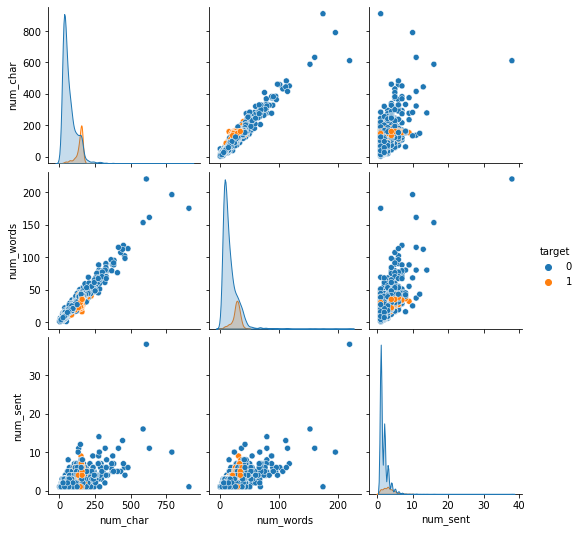

In [34]:
#relationship btw each column 
sns.pairplot(spam, hue = 'target')

<AxesSubplot:>

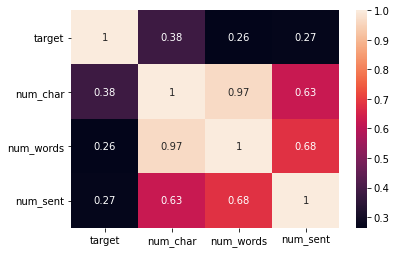

In [35]:
#corelations btw columns using heatmap

sns.heatmap(spam.corr(), annot = True)

Chances of Multicolinearity will be high as there are Strong corelation between them, so we will take only one column i.e. num_char as it has maximum relation with the target coloumn.

## Data Preprocessing

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
import string

In [37]:
# defining function to apply functions: Lowercase, Tokenize, Alphanumeric, Stopwords, Stemming

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [38]:
spam["transformed_text"] = spam['text'].apply(transform_text)

In [39]:
spam.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
# Generating a Word Cloud

!pip install wordcloud
from wordcloud import WordCloud


In [47]:
wc = WordCloud(width = 500, height = 500, min_font_size= 10, background_color= 'white')

In [64]:
#Generating Word Cloud for Spam Msgs

spam_wc = wc.generate(spam[spam['target']==1]['transformed_text'].str.cat(sep = " "))

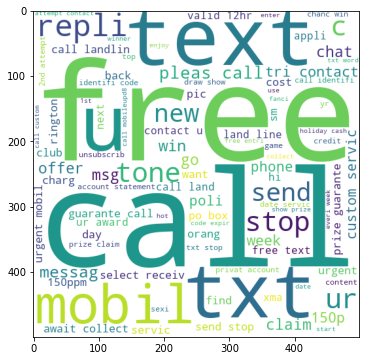

In [65]:
plt.figure(figsize= (12,6))
plt.imshow(spam_wc)

In the above Word Cloud, we can clearly see the words like text, free, reply, call, claim..etc. these words are generally seen in the SPAM Msgs.

In [66]:
#Generating Word Cloud for Ham Msgs

ham_wc = wc.generate(spam[spam['target']==0]['transformed_text'].str.cat(sep = " "))

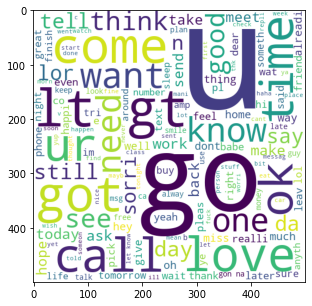

In [67]:
plt.figure(figsize= (10,5))
plt.imshow(ham_wc)

In the above Word Cloud, we can clearly see the words like love, come, go, call, time..etc. these words are generally seen in the Ham Msgs.

In [73]:
# top 30 words used in HAM and SPAM msgs

spam_corpus = []
for msg in spam[spam['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

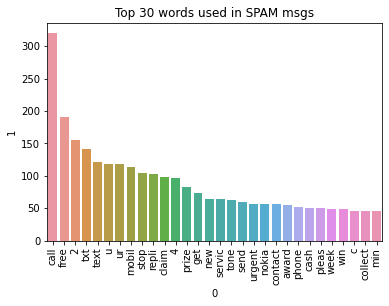

In [93]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.title("Top 30 words used in SPAM msgs")
plt.xticks(rotation = "vertical")
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

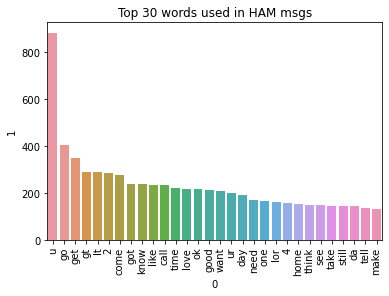

In [92]:
ham_corpus = []
for msg in spam[spam['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.title("Top 30 words used in HAM msgs")
plt.xticks(rotation = "vertical")
plt.show

## Model Building

In [118]:
# Text Vectorization

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(spam["transformed_text"]).toarray()
X.shape

(5169, 6677)

In [119]:
y = (spam["target"]).values
y

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 45)

In [121]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB
mnb = MultinomialNB
bnb = BernoulliNB

In [122]:
# GaussianNB
gnb.fit(X_train,y_train)
y_predict1 = gnb.predict(X_test)

print("Accuracy score of Gaussian Naive Bayes Model is ", accuracy_score(y_test,y_predict1))
print("Confusion Matrix of  Naive Bayes Model is ", confusion_matrix(y_test,y_predict1))
print("Precision score of Gaussian Naive Bayes Model is " , precision_score(y_test,y_predict1))

TypeError: fit() missing 1 required positional argument: 'y'